Let test KS (https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test) with train/test, using PCA and raw features

The idea is compare two CDF functions and get MAX(abs(distance)), bigger distance ~= not from same distribuition (< 5% pvalue)

nothing special, just some tests


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


In [2]:
# We start by loading the training / test data and combining them with minimal preprocessing necessary
print('Loading')
xtrain = pd.read_csv('../input/train.csv')
xtest  = pd.read_csv('../input/test.csv')

#drop columns
print('Drop')
xtrain.drop(['id', 'target'], axis = 1, inplace = True)
xtest.drop(['id'], axis = 1, inplace = True)

# add identifier and combine
print('Merge')
xtrain['istrain'] = 1
xtest['istrain'] = 0
xdat = pd.concat([xtrain, xtest], axis = 0)

# convert non-numerical columns to integers
print('Transform')
df_numeric = xdat.select_dtypes(exclude=['object'])
df_obj = xdat.select_dtypes(include=['object']).copy()
    
for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]
    
xdat = pd.concat([df_numeric, df_obj], axis=1)
y = xdat['istrain']
xdat.drop('istrain', axis = 1, inplace = True)
print('Done')


Loading
Drop
Merge
Transform
Done


Well let's PCA/ICA this dataset

In [3]:
from sklearn.decomposition import PCA,FastICA

pca = PCA(n_components=None)
ica = FastICA(n_components=10)

print("Fit PCA")
pca.fit(xdat[y==1]) #only running on train dataset
print("Fit ICA")
ica.fit(xdat[y==1])

print('PCA explained variance ratio: ',pca.explained_variance_ratio_)

Fit PCA
Fit ICA
PCA explained variance ratio:  [  9.07732702e-01   2.54234063e-02   1.10337290e-02   7.02687536e-03
   6.28341600e-03   6.11974773e-03   5.35864727e-03   4.53274020e-03
   3.62930732e-03   2.94262288e-03   2.39246012e-03   1.77464330e-03
   1.66653491e-03   1.51185737e-03   1.48285378e-03   1.29501400e-03
   1.20521481e-03   1.07276311e-03   1.03952906e-03   8.41552768e-04
   7.97304206e-04   5.99047488e-04   5.32279961e-04   4.49106056e-04
   3.79446135e-04   2.59014284e-04   2.18484535e-04   2.05772022e-04
   1.94589898e-04   1.89224902e-04   1.72624400e-04   1.70476465e-04
   1.43343391e-04   1.41717291e-04   1.29732683e-04   1.08730018e-04
   1.08119172e-04   1.00602896e-04   9.91776896e-05   8.94853004e-05
   8.85969311e-05   8.14395861e-05   7.97099982e-05   6.88534926e-05
   6.87165781e-05   6.83268781e-05   3.40411929e-05   1.97867999e-05
   1.53140296e-05   1.02319514e-05   6.93945320e-06   1.99022015e-06
   9.90050717e-07   8.14646230e-07   3.52248028e-07   7.

/opt/conda/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Interesting, big explained variance (0.9) in only one component of PCA

In [4]:
print("Transform PCA")
pcadat=pca.transform(xdat)
print("Transform ICA")
icadat=ica.transform(xdat)

print('PCA: ',np.shape(pcadat))
print('ICA: ',np.shape(icadat))

Transform PCA
Transform ICA
PCA:  (1488028, 57)
ICA:  (1488028, 10)


from: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html

If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

Let's plot distance and see how ks_2samp() works :)

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00154233071536


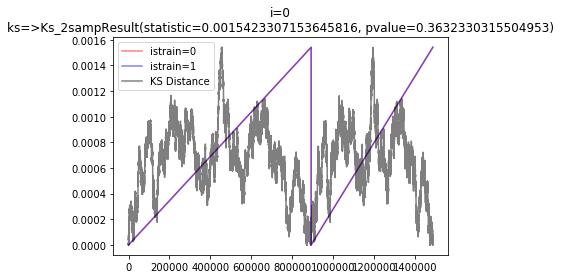

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00126651111676


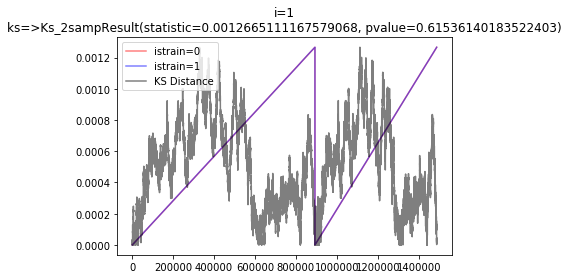

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00138239639573


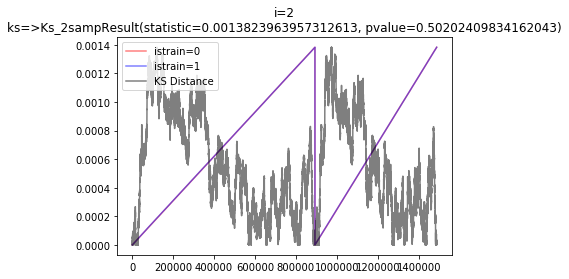

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00147755829993


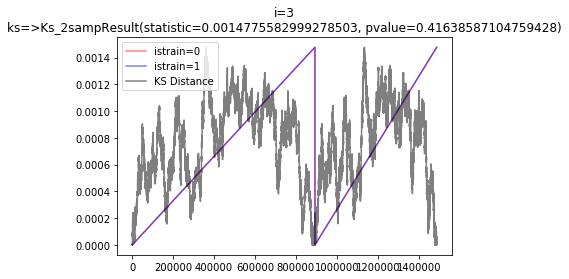

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00110977082938


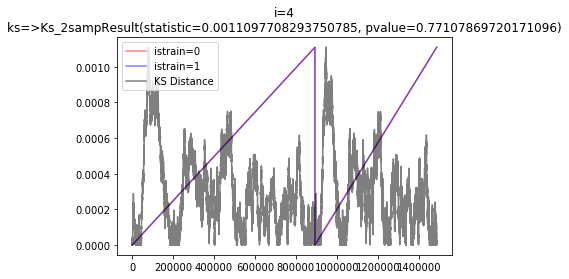

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00200108817824


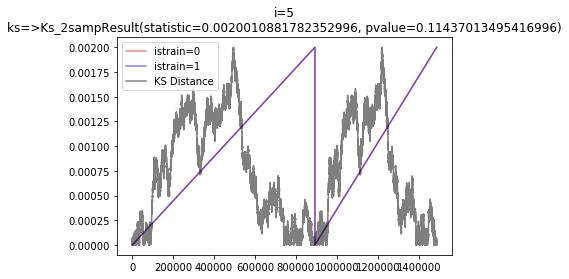

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.001547320806


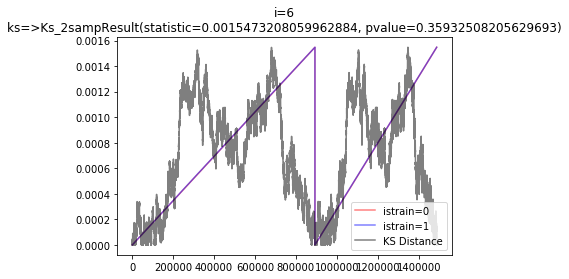

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00121937130781


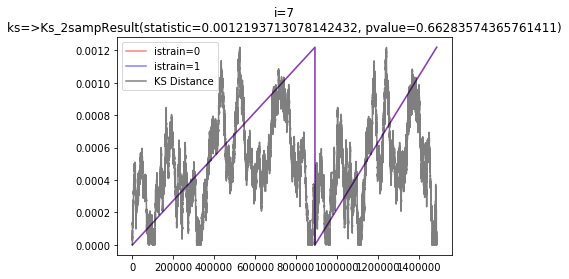

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00172560297002


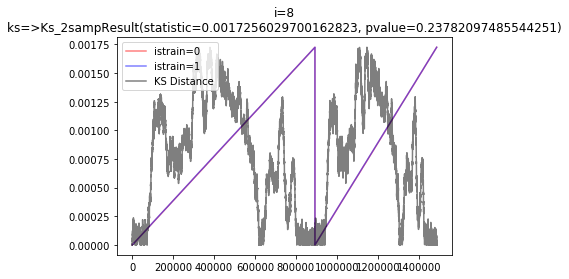

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00132665383047


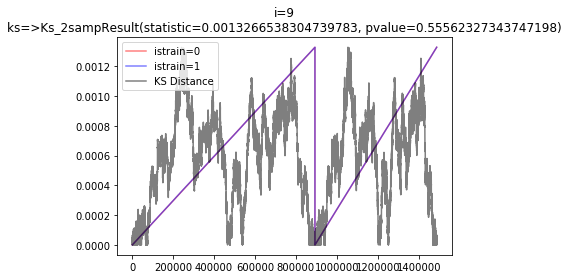

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00185859846882


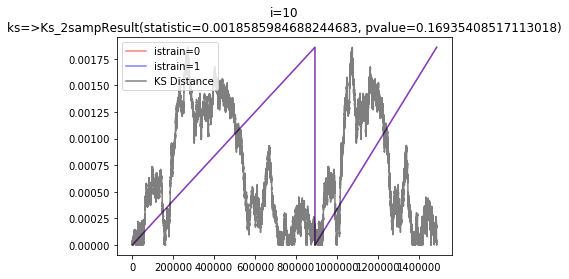

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.000850023752739


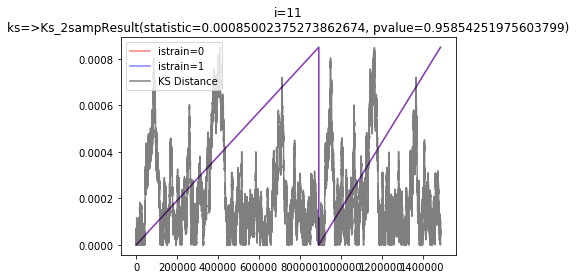

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00201750350587


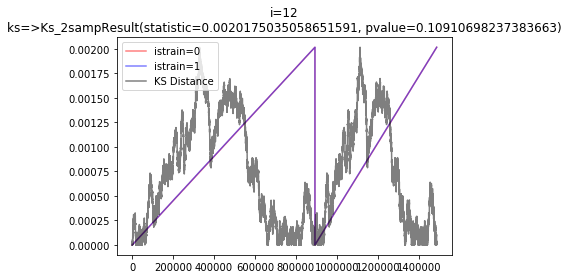

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00237467690991


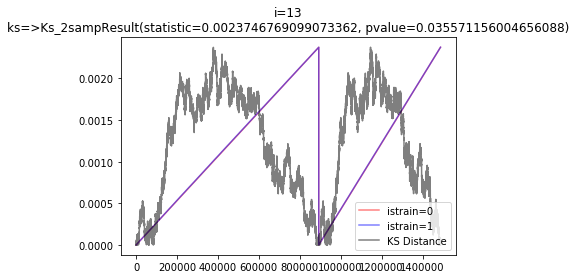

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.0016861190036


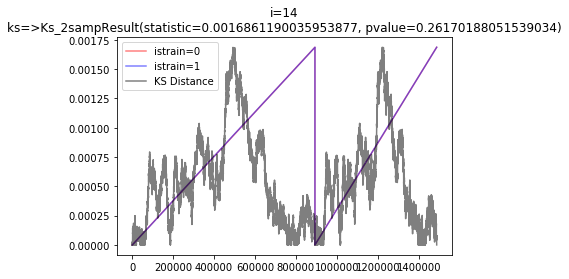

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00100100284563


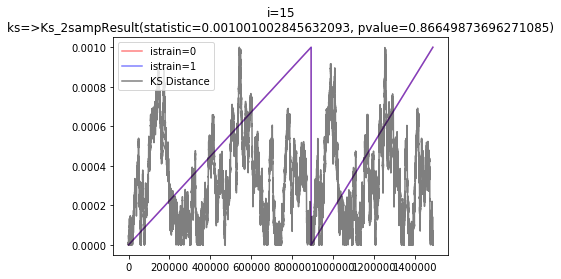

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00130379628855


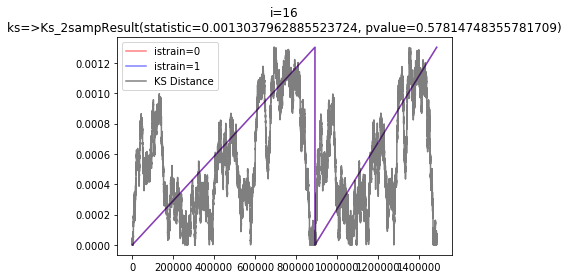

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.0014553105265


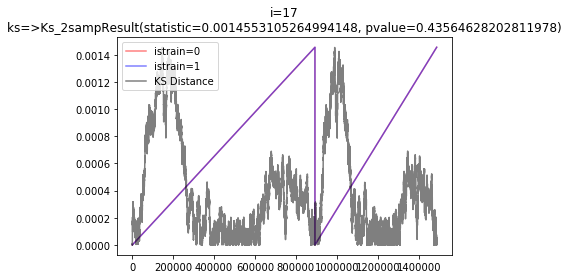

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00116047238333


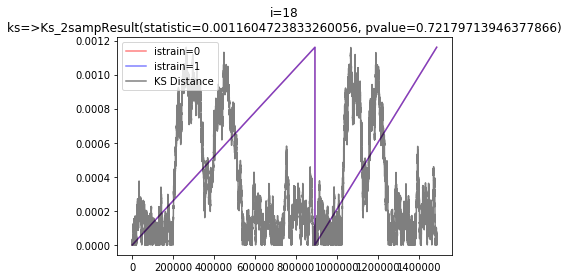

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00123115621865


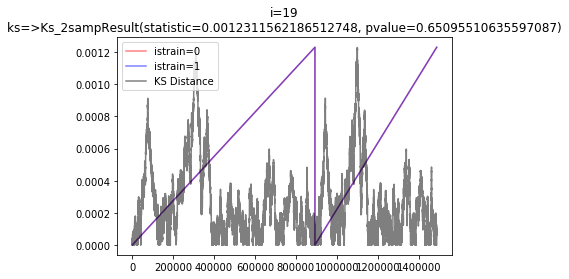

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00157792937785


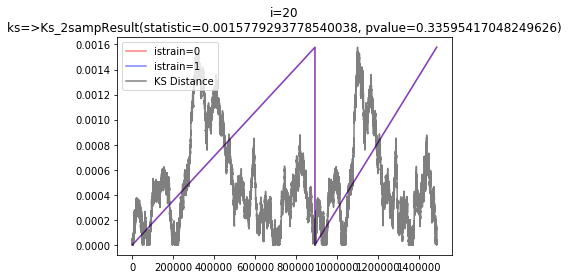

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.0013956305323


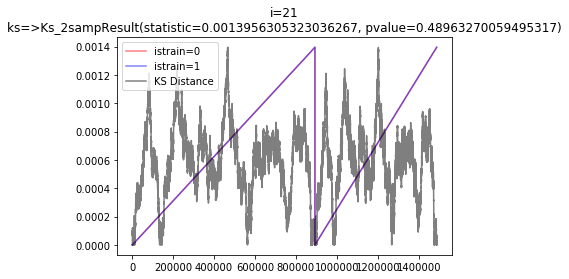

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.000990511380149


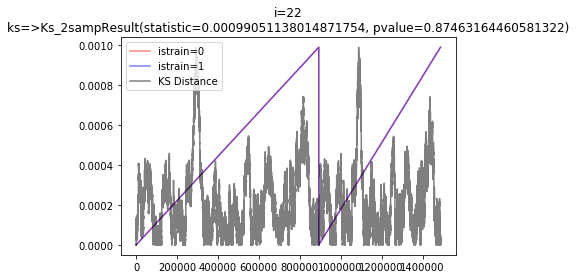

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00174685678542


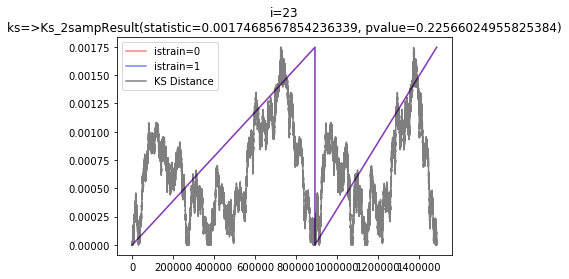

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.000879697853063


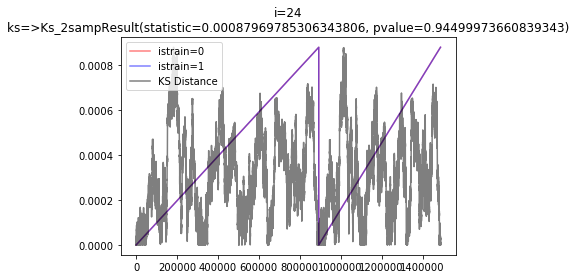

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00144429948196


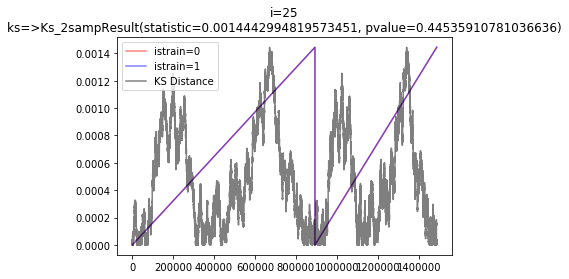

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00159927139555


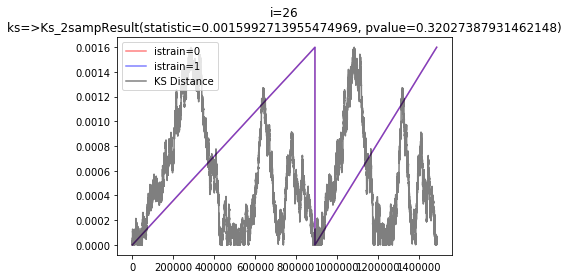

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00100853165368


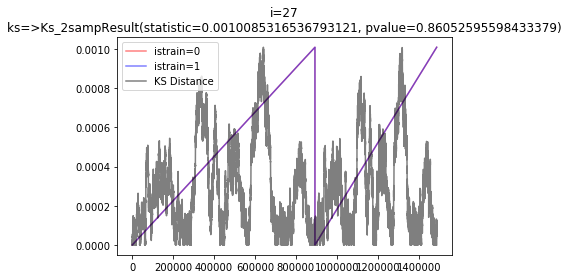

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00147491655941


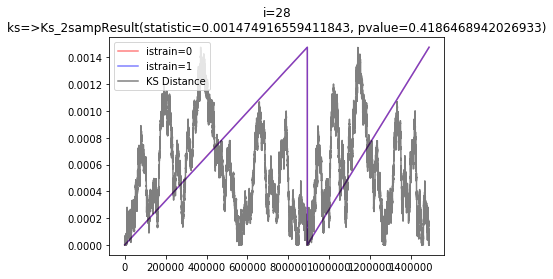

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00156660445421


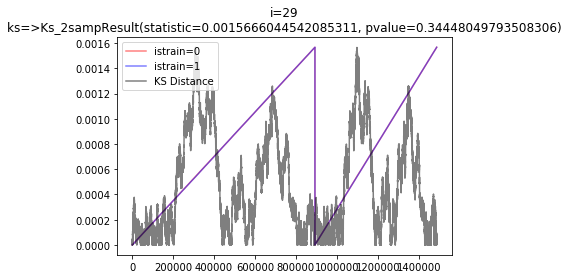

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00186766815982


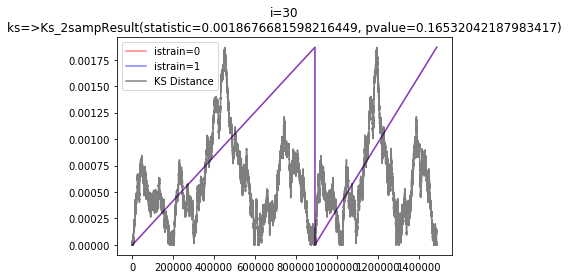

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00123447991985


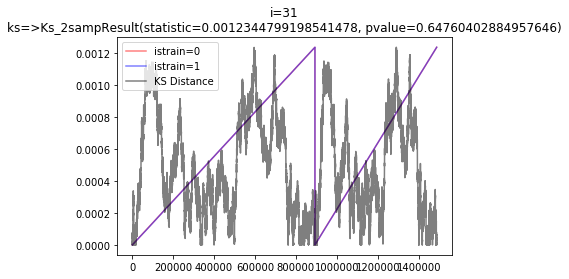

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.000865092772354


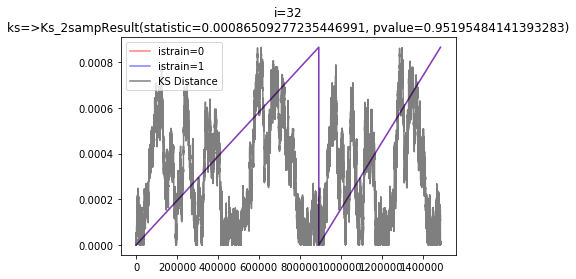

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00134238039294


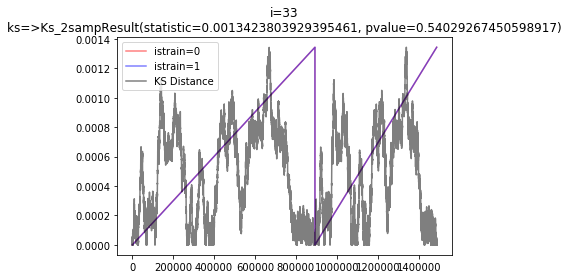

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00147591009592


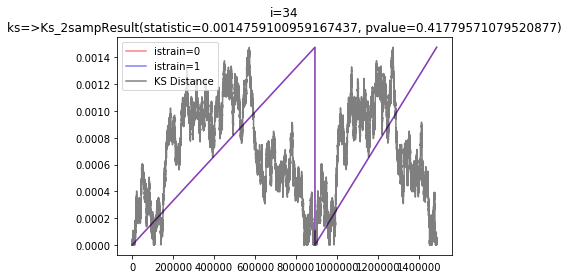

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.000962982060147


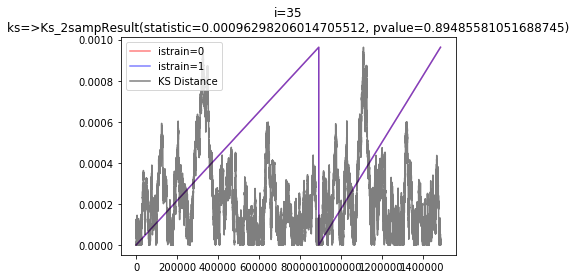

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00152397424495


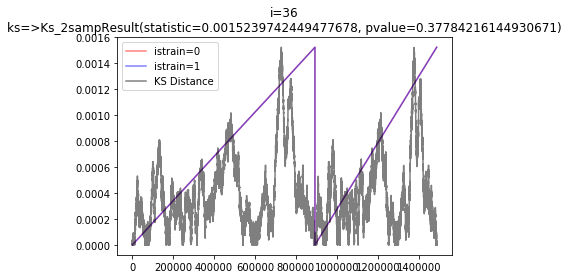

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00166790040664


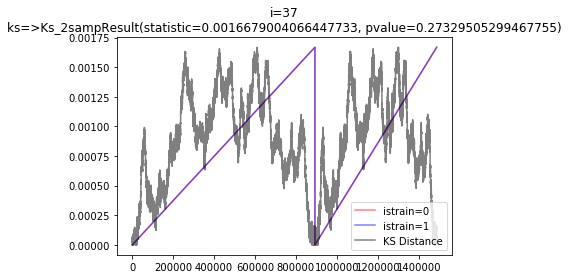

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00202112179427


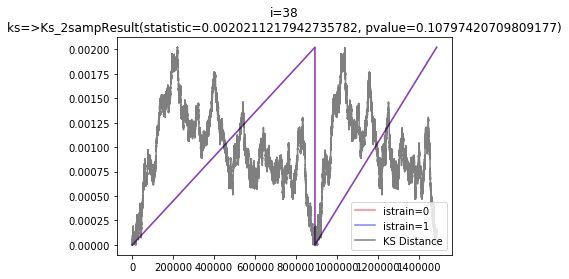

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.0015381379454


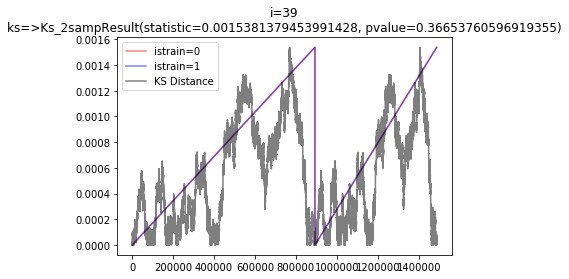

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.0014943310508


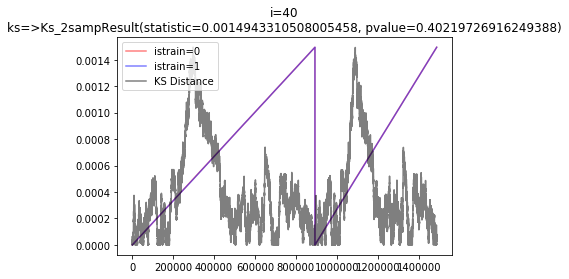

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00235847588568


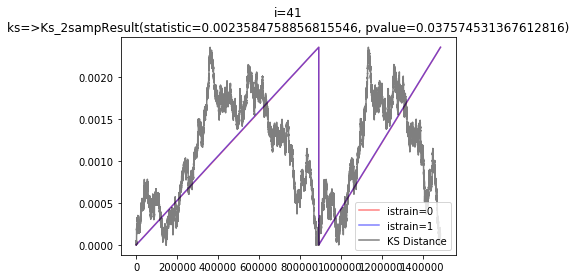

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00124603491613


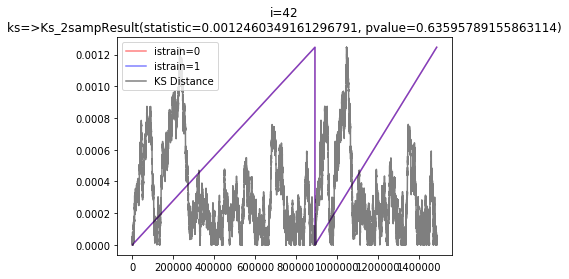

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00160406892097


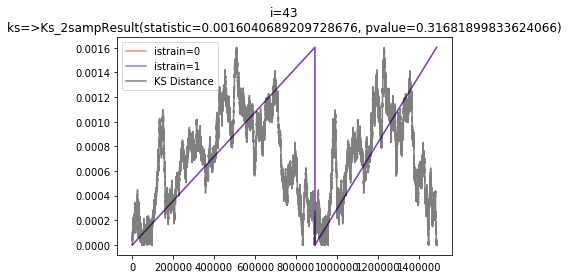

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.000911474296052


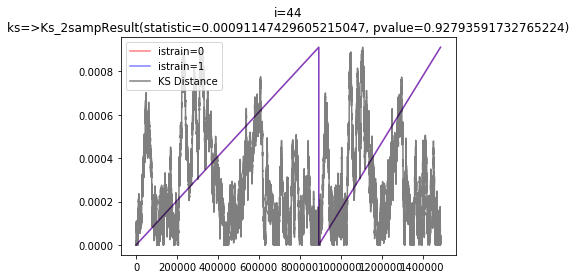

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00185739686134


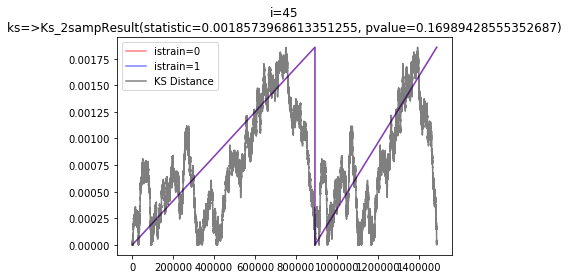

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.0012319135329


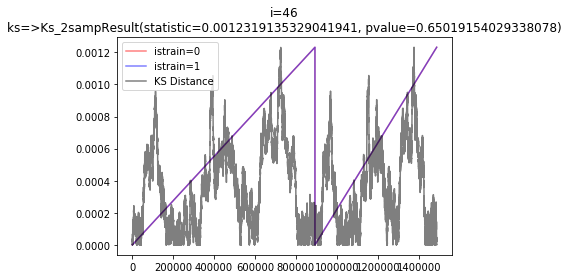

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00119119587859


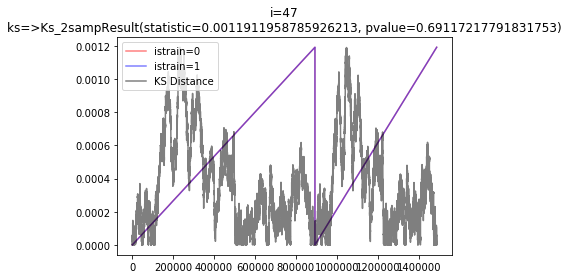

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00164165111122


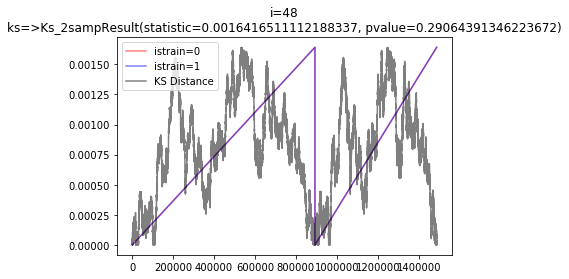

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00135890873963


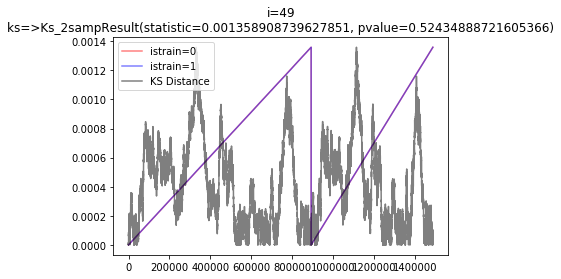

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.0018478718123


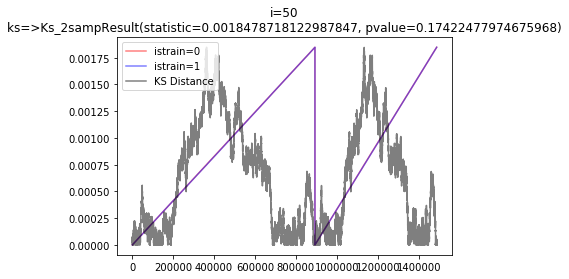

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00221259982721


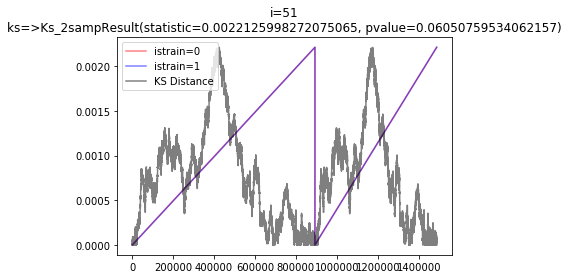

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00126053360161


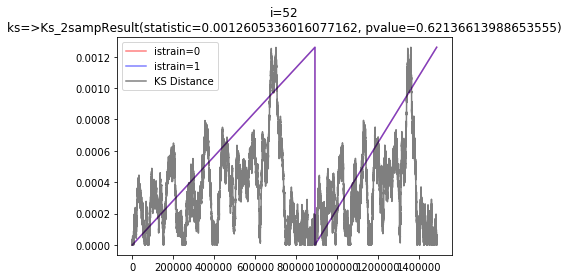

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00128129595159


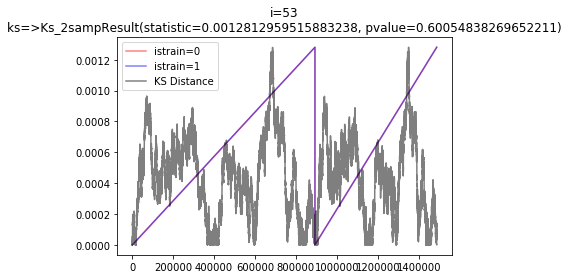

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00104015574863


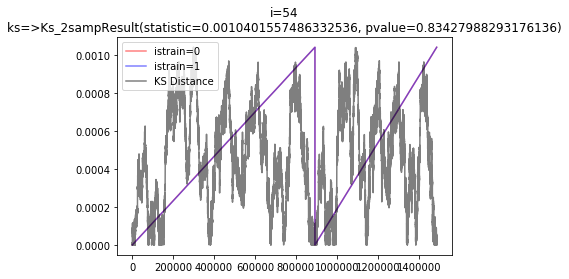

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00111579772215


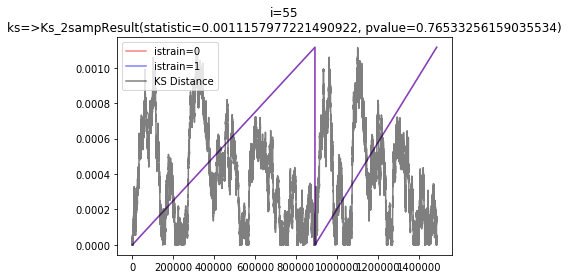

len(cdf0)= 1488028 ,len(cdf0)= 1488028 ,KS Distance: 0.00132130258317


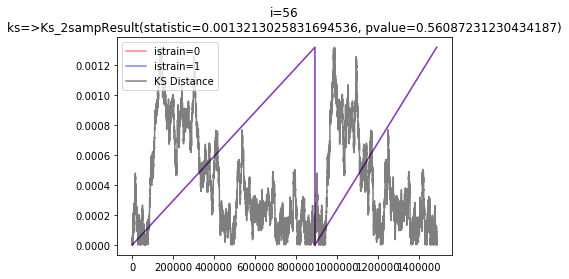

In [5]:
for i in range(0,57):
    data0 = np.sort(pcadat[y==0,i])
    data1 = np.sort(pcadat[y==1,i])
    n0 = len(data0)
    n1 = len(data1)
    data_all = np.concatenate([data0,data1])
    cdf0 = np.searchsorted(data0,data_all,side='right')/(1.0*n0)
    cdf1 = np.searchsorted(data1,data_all,side='right')/(1.0*n1)
    ks=np.max(np.abs(cdf1-cdf0))
    print( 'len(cdf0)=',len(cdf0),
          ',len(cdf0)=',len(cdf1),
          ',KS Distance:',ks)
    plt.title('i='+str(i)+'\nks=>'+str(ks_2samp(data0,data1)))
    plt.plot(cdf0*ks,color='red' ,alpha=.5,label='istrain=0') # rescale to ks value
    plt.plot(cdf1*ks,color='blue',alpha=.5,label='istrain=1')
    plt.plot(np.abs(cdf1-cdf0),color='black',alpha=.5,label='KS Distance')
    plt.legend()
    plt.show()


A bit confuse, why cdf return to 0 after going to 1? (must check if it's ok...)

Let's compute all KS from train/test on each component and each feature

Starting with PCA

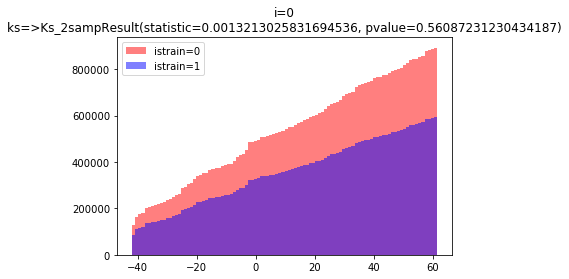

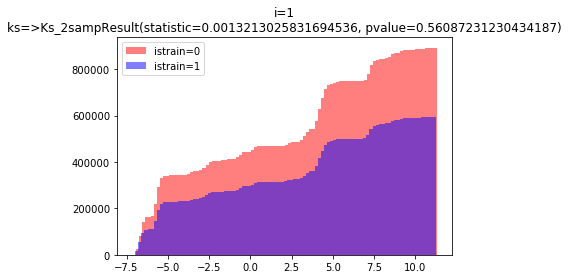

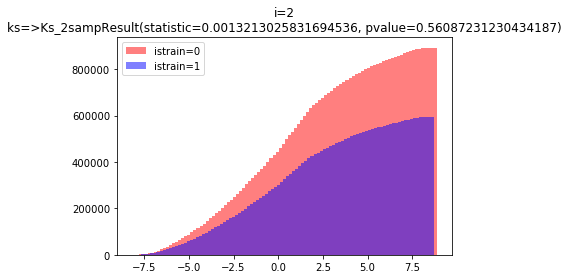

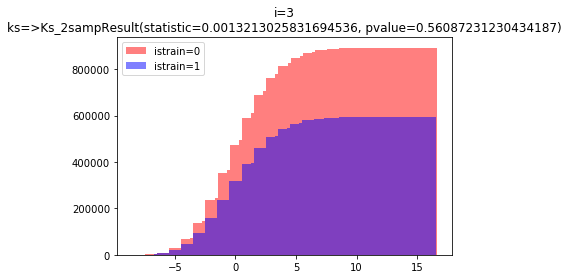

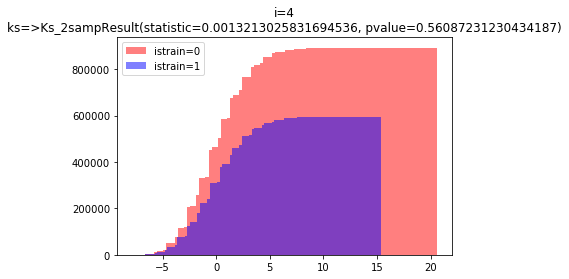

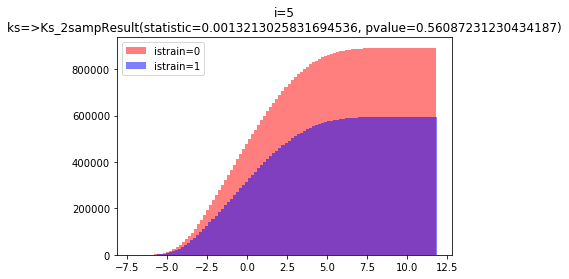

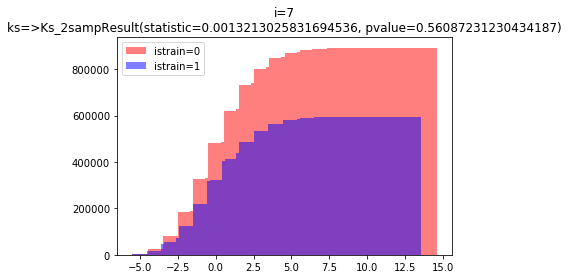

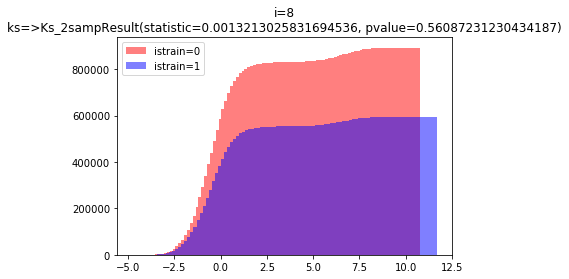

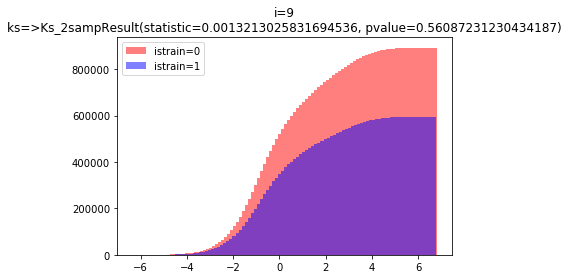

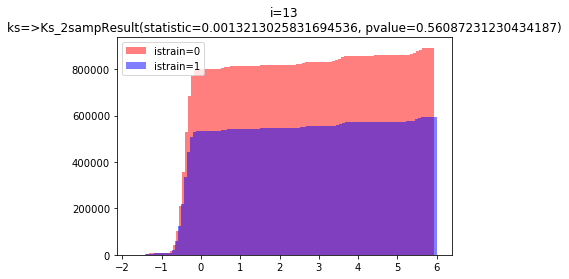

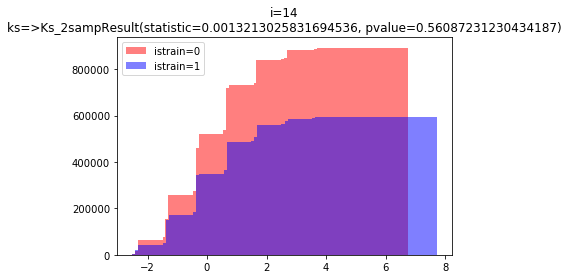

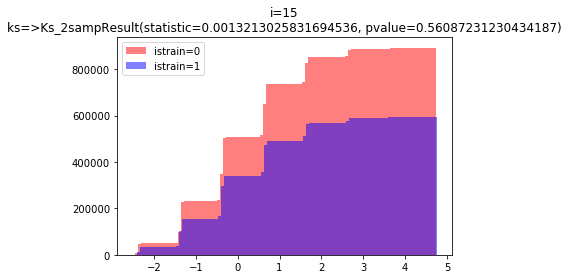

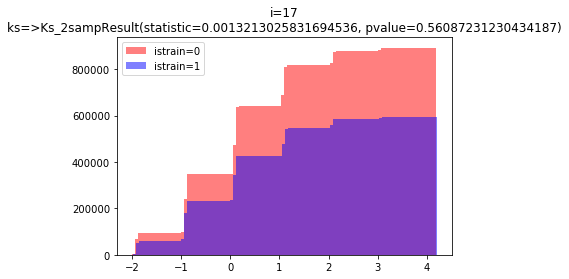

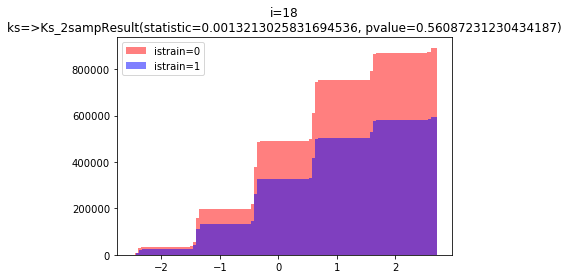

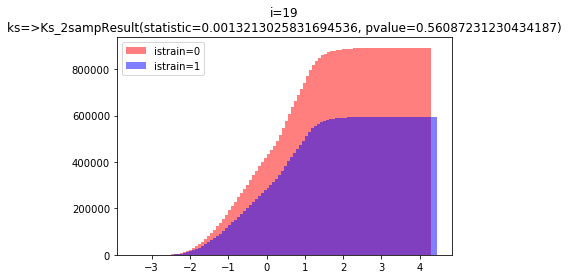

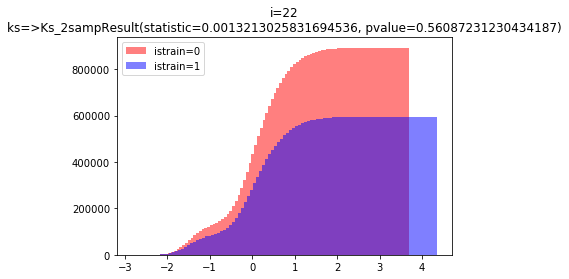

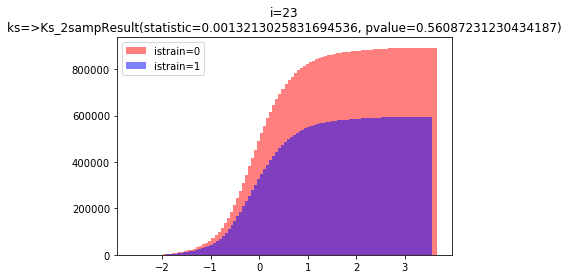

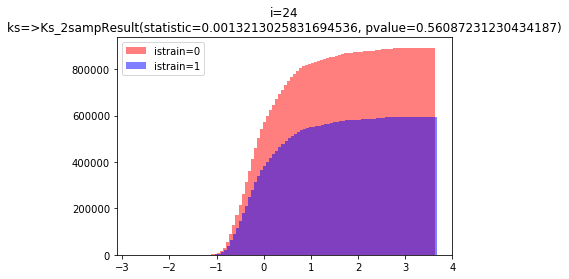

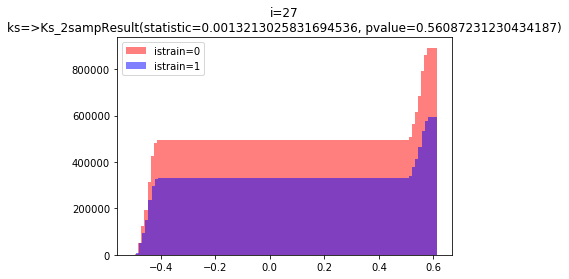

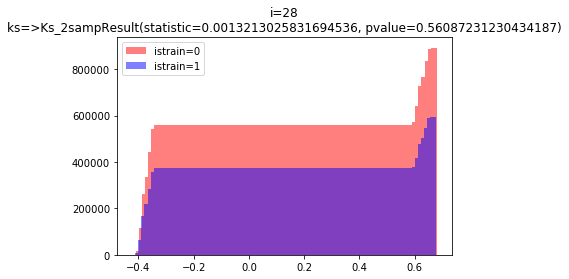

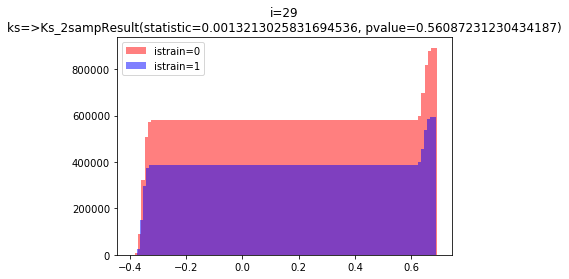

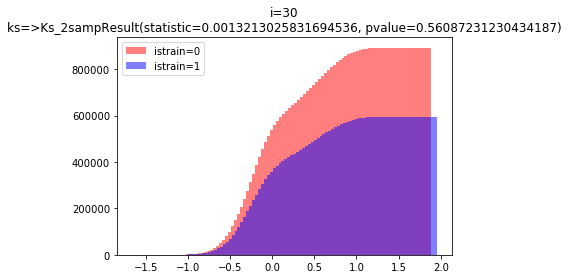

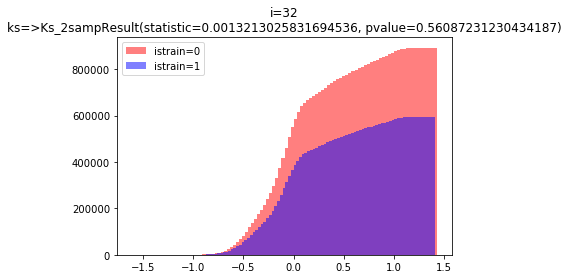

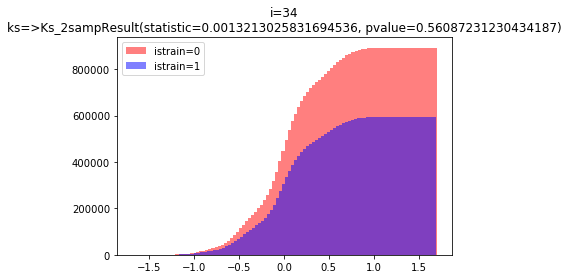

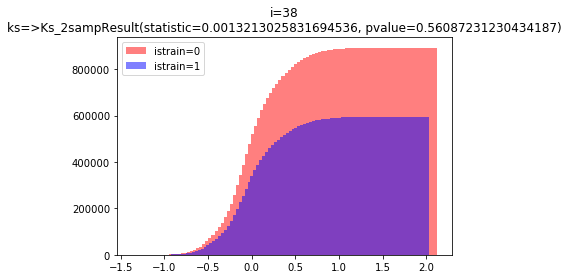

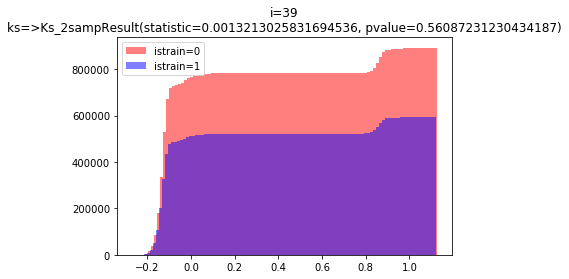

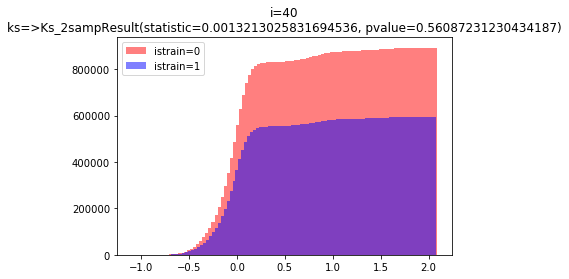

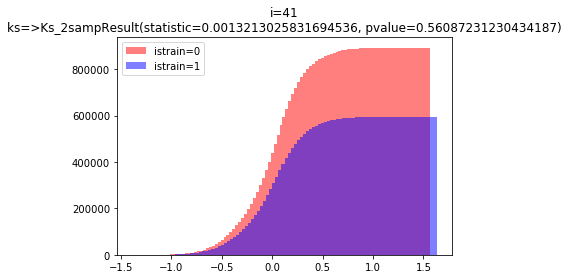

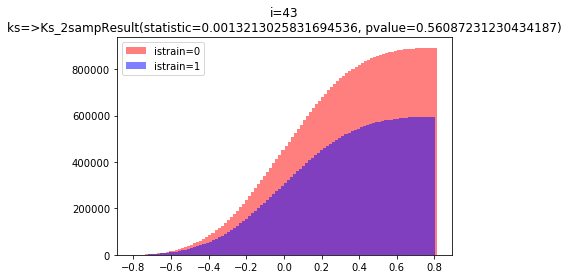

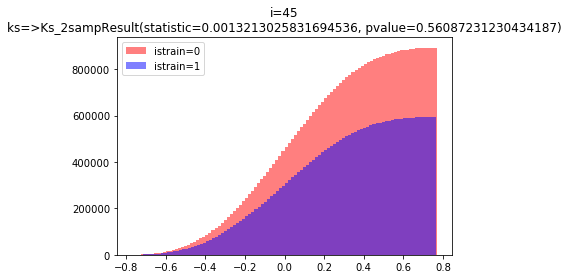

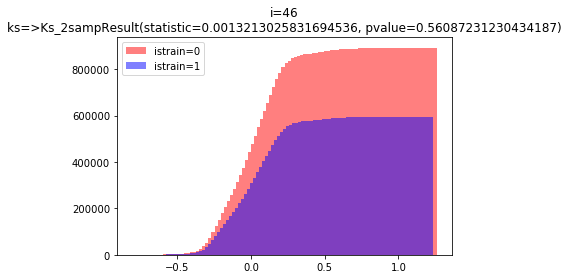

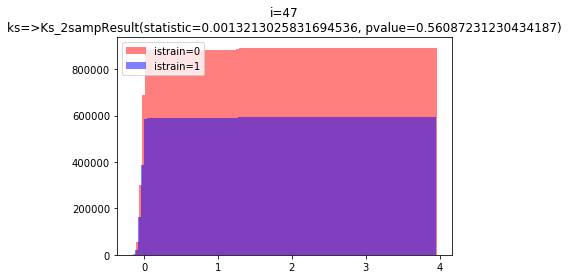

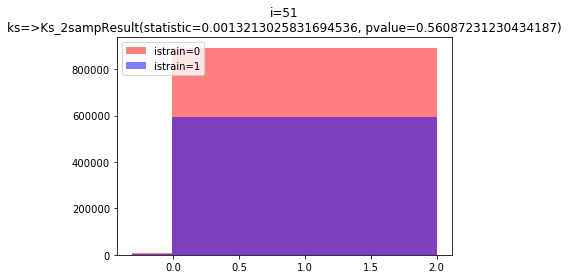

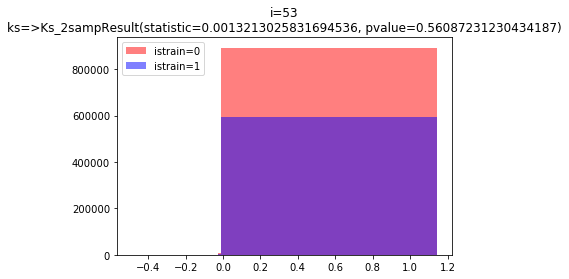

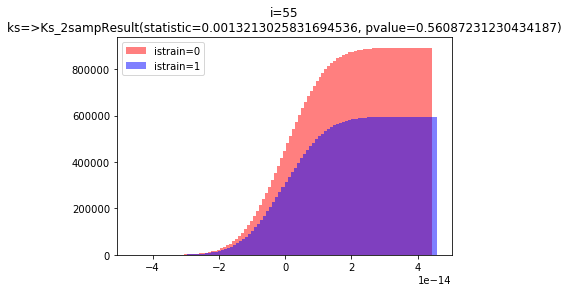

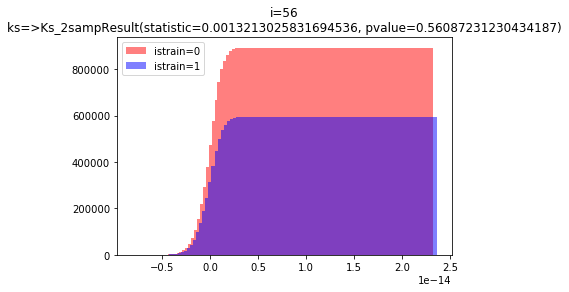

In [6]:
pca_dict={}
for i in range(0,57):
    pca_dict[i]=ks_2samp(data0,data1)[1]
    plt.title('i='+str(i)+'\nks=>'+str(ks_2samp(data0,data1)))
    plt.hist(pcadat[y==0,i],color='red' ,alpha=.5,label='istrain=0',bins=100,cumulative=True)
    plt.hist(pcadat[y==1,i],color='blue',alpha=.5,label='istrain=1',bins=100,cumulative=True)
    plt.legend()
    plt.show()


What about ICA?

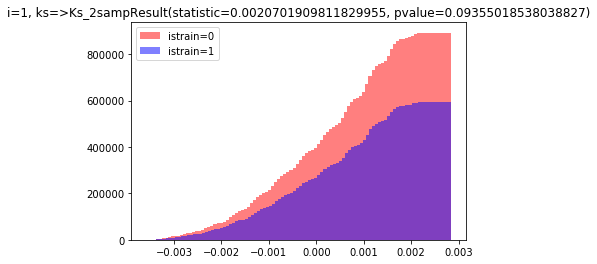

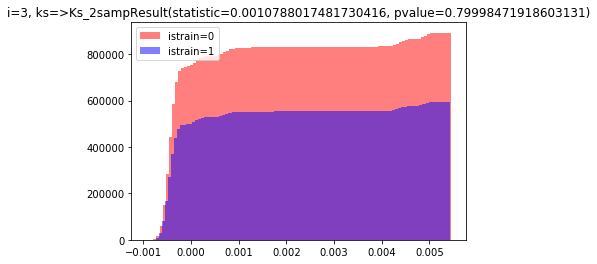

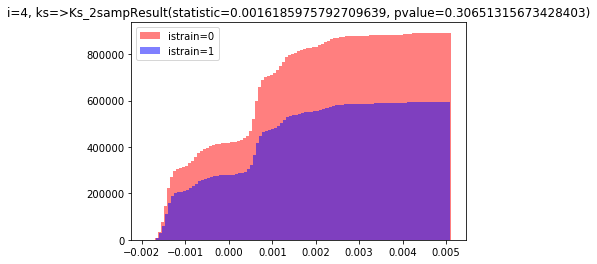

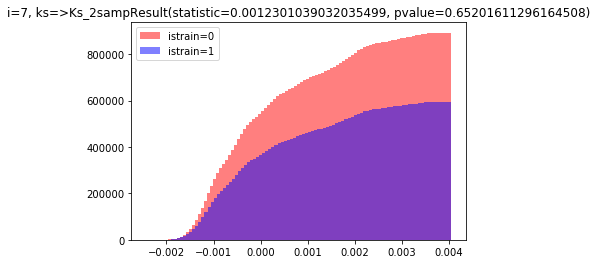

In [7]:
ica_dict={}
for i in range(0,10):
    ica_dict[i]=ks_2samp(icadat[y==0,i],icadat[y==1,i])[1]
    plt.title('i='+str(i)+', ks=>'+str(ks_2samp(icadat[y==0,i],icadat[y==1,i])))
    plt.hist(icadat[y==0,i],color='red',alpha=.5,label='istrain=0',bins=100,cumulative=True)
    plt.hist(icadat[y==1,i],color='blue',alpha=.5,label='istrain=1',bins=100,cumulative=True)
    plt.legend()
    plt.show()


What about Features (xdat)?

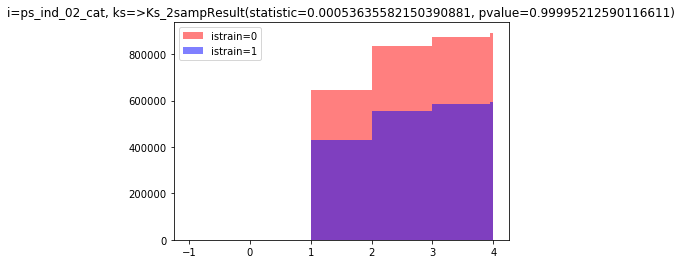

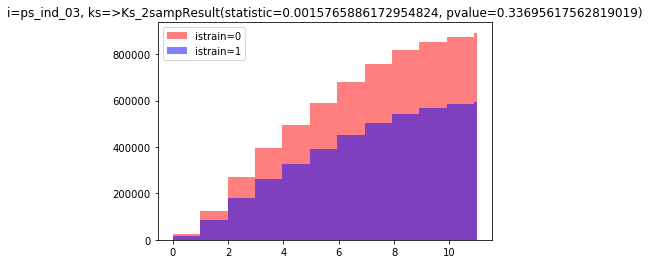

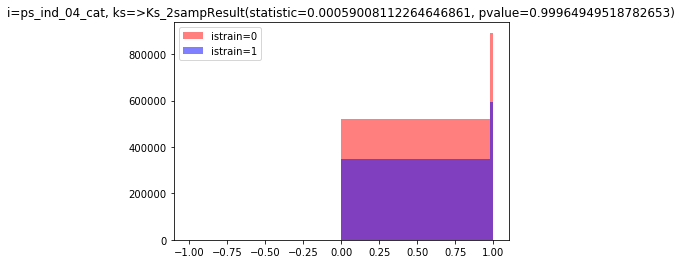

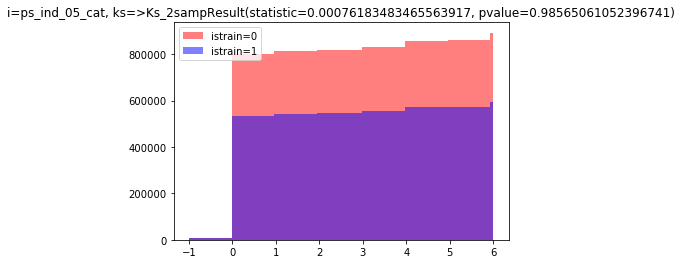

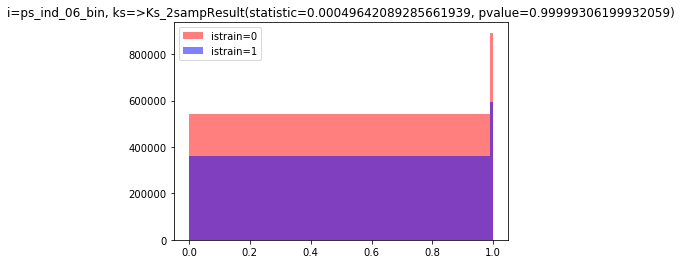

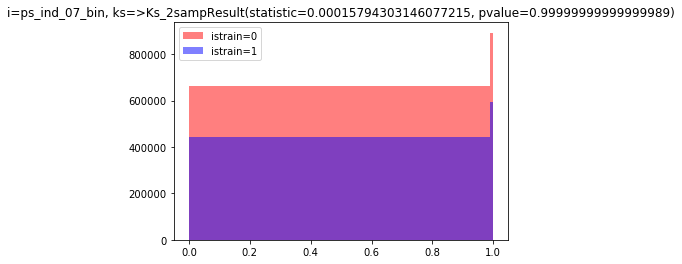

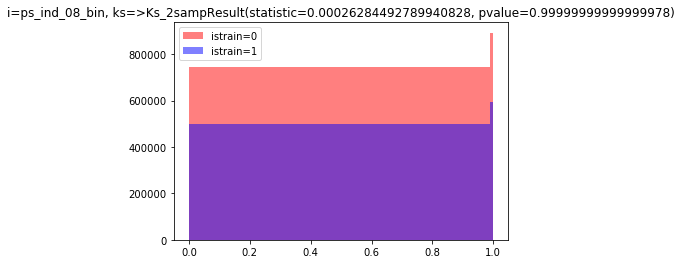

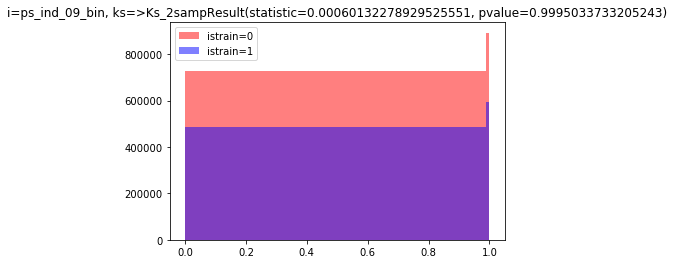

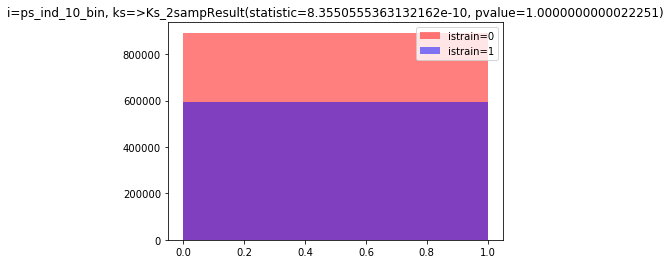

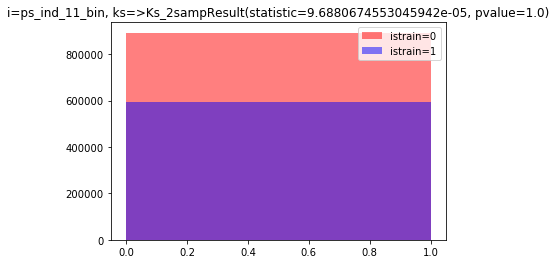

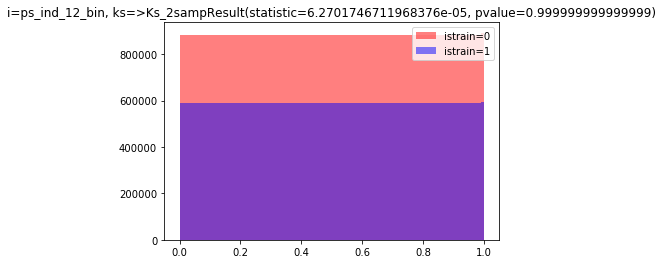

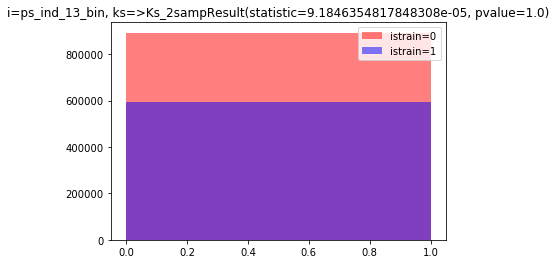

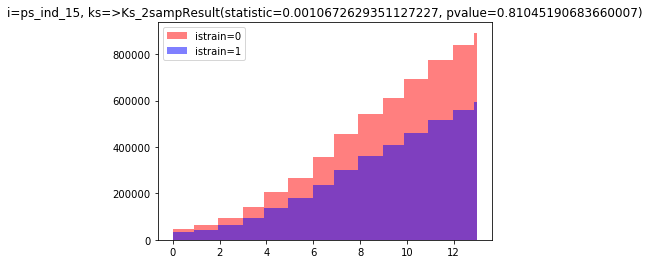

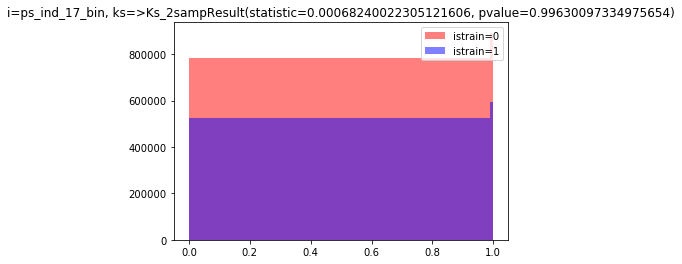

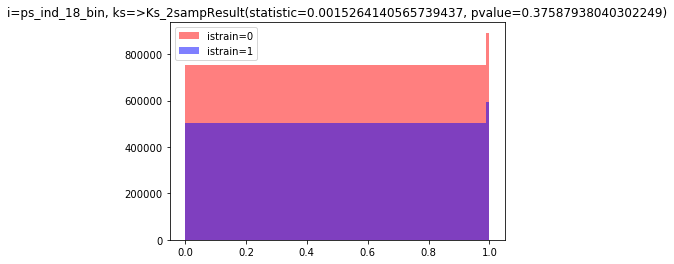

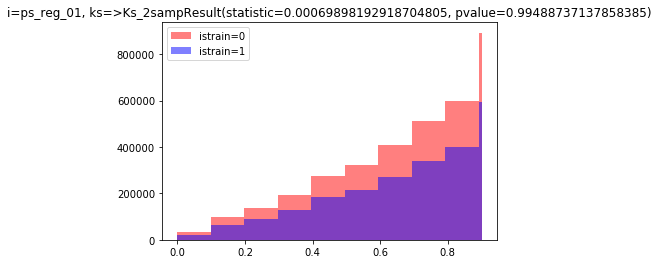

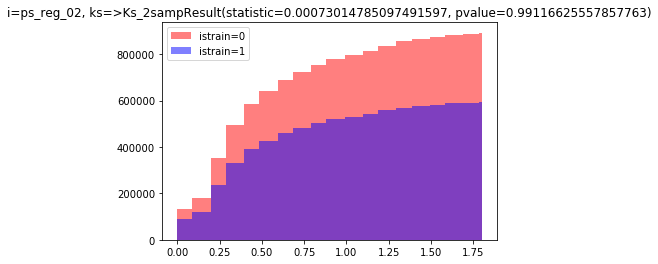

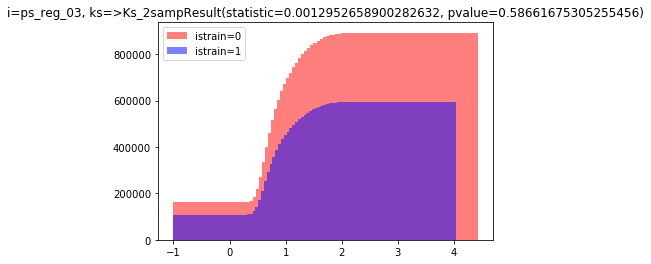

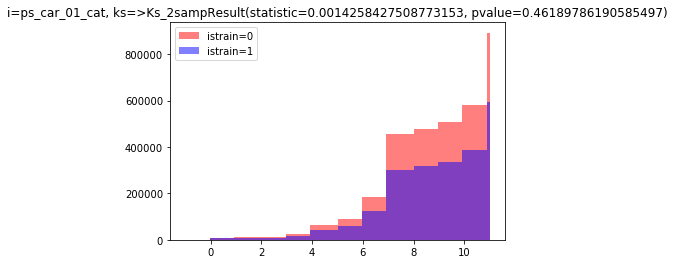

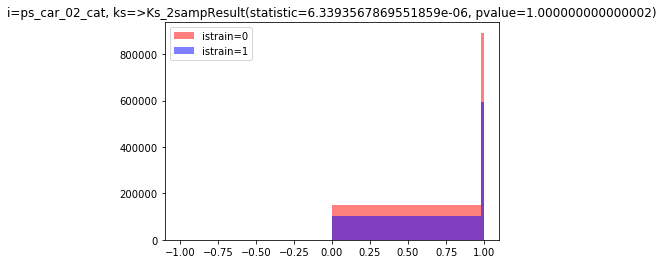

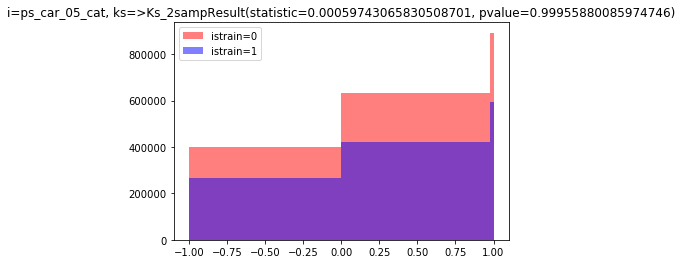

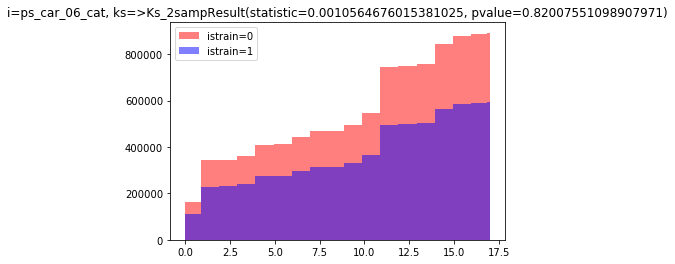

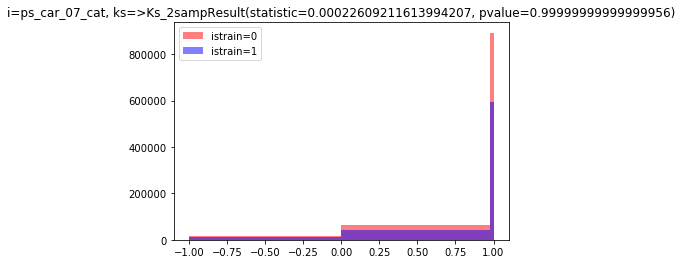

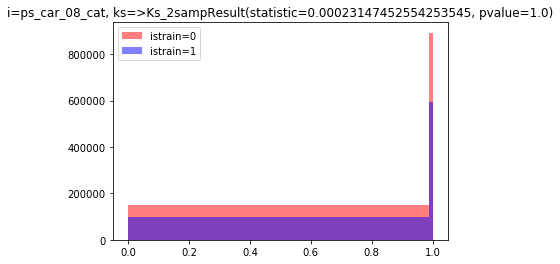

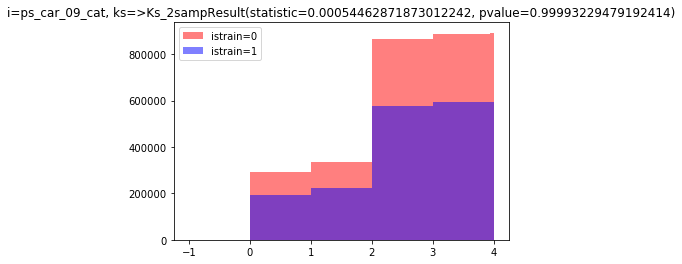

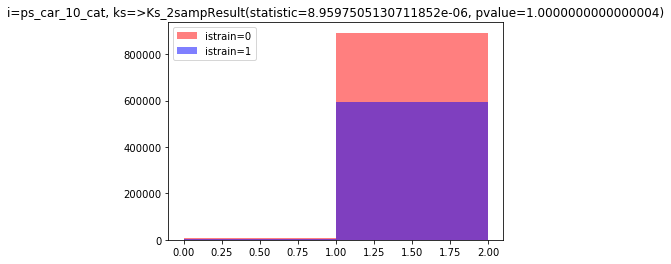

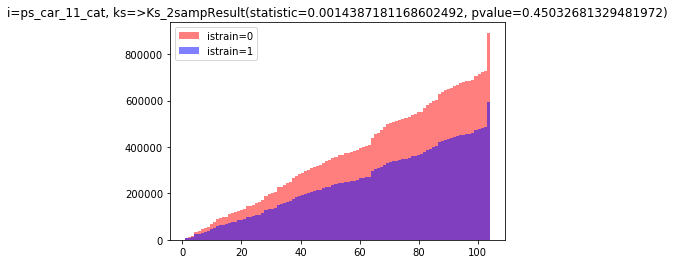

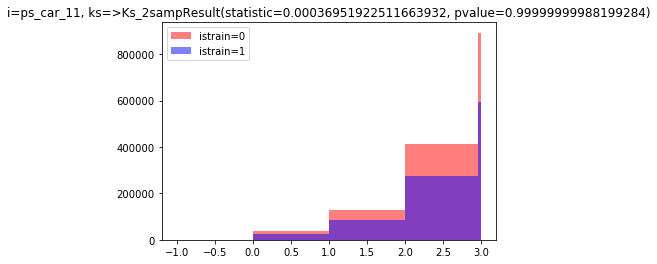

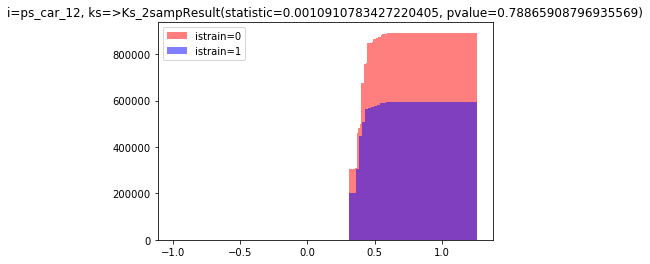

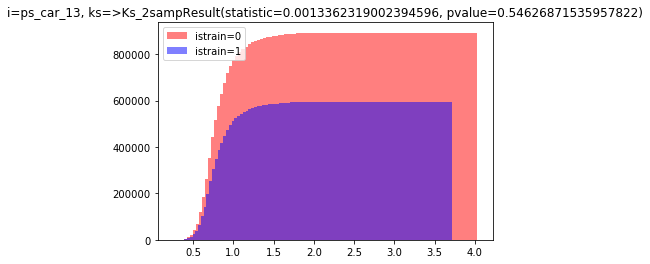

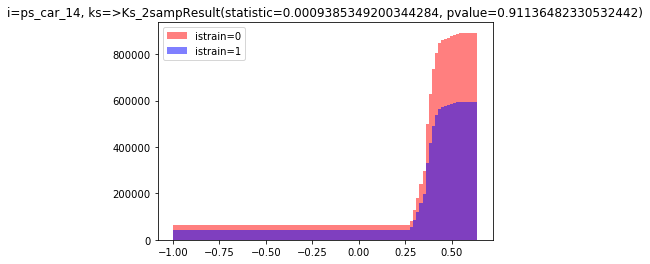

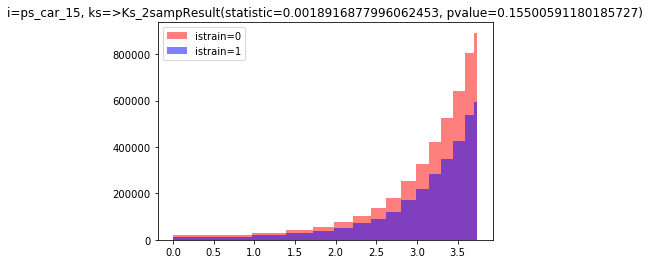

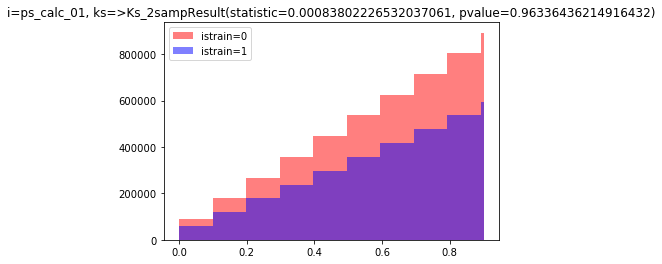

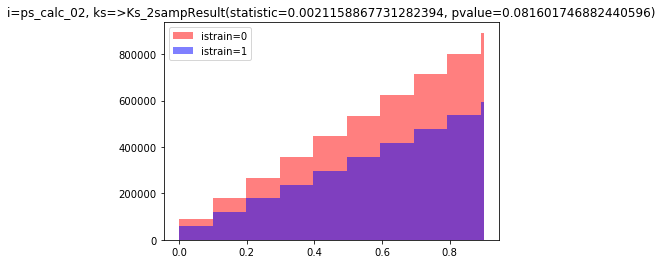

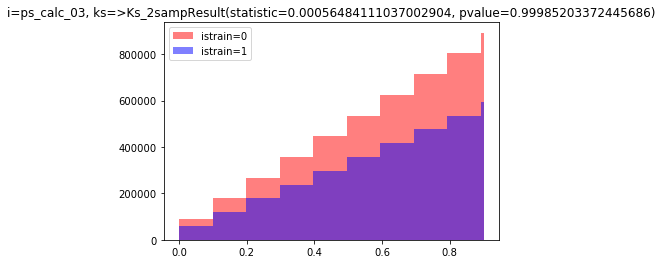

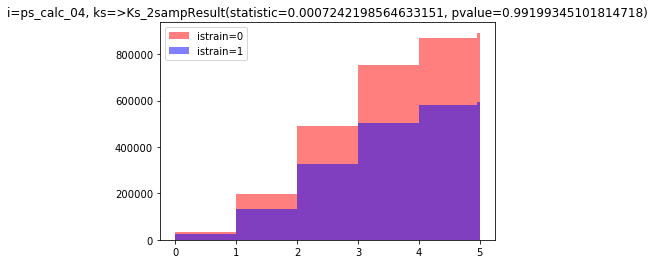

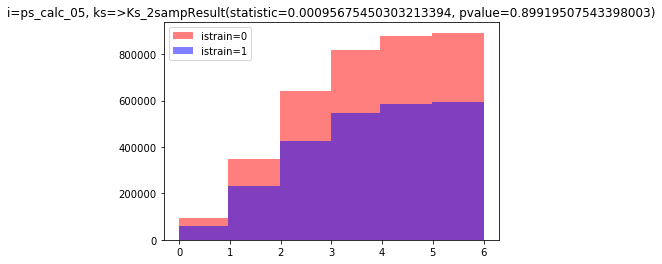

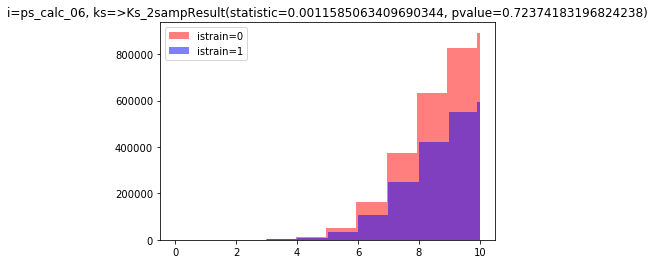

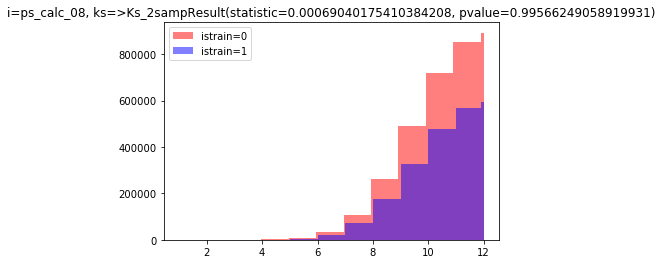

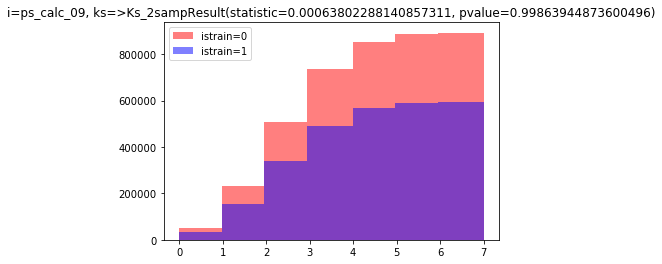

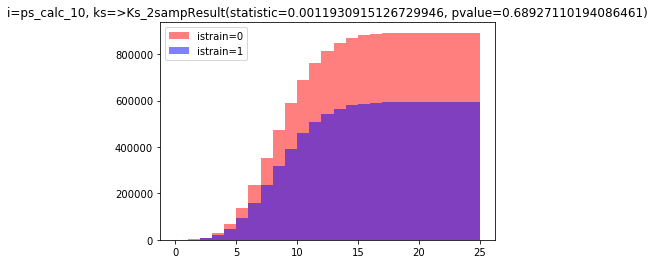

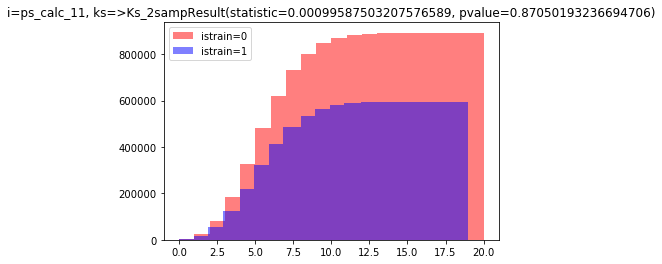

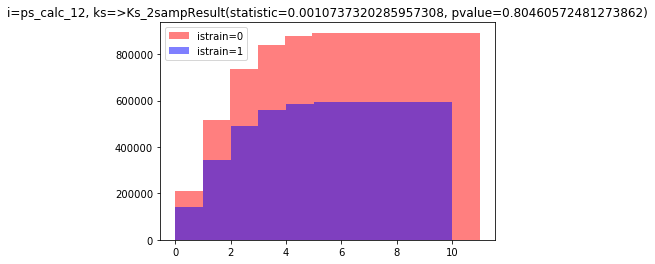

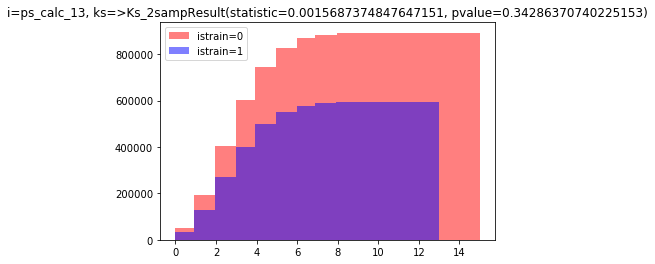

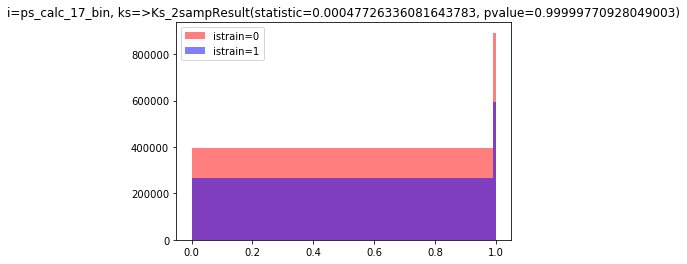

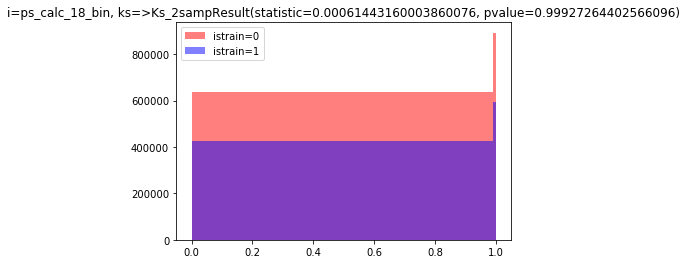

In [8]:
fields_dict={}
for i in xdat.columns:
    fields_dict[i]=ks_2samp(xdat[y==0][i],xdat[y==1][i])[1]
    plt.title('i='+str(i)+', ks=>'+str(ks_2samp(xdat[y==0][i],xdat[y==1][i])))
    plt.hist(xdat[y==0][i],color='red',alpha=.5,label='istrain=0',bins=100,cumulative=True)
    plt.hist(xdat[y==1][i],color='blue',alpha=.5,label='istrain=1',bins=100,cumulative=True)
    plt.legend()
    plt.show()


Resume:

In [9]:
print('PCA:')
print(pd.Series(pca_dict).sort_values())

PCA:
0     0.560872
30    0.560872
31    0.560872
32    0.560872
33    0.560872
34    0.560872
35    0.560872
36    0.560872
37    0.560872
38    0.560872
39    0.560872
40    0.560872
41    0.560872
42    0.560872
43    0.560872
44    0.560872
45    0.560872
46    0.560872
47    0.560872
48    0.560872
49    0.560872
50    0.560872
51    0.560872
52    0.560872
53    0.560872
54    0.560872
29    0.560872
55    0.560872
28    0.560872
26    0.560872
1     0.560872
2     0.560872
3     0.560872
4     0.560872
5     0.560872
6     0.560872
7     0.560872
8     0.560872
9     0.560872
10    0.560872
11    0.560872
12    0.560872
13    0.560872
14    0.560872
15    0.560872
16    0.560872
17    0.560872
18    0.560872
19    0.560872
20    0.560872
21    0.560872
22    0.560872
23    0.560872
24    0.560872
25    0.560872
27    0.560872
56    0.560872
dtype: float64


Interesting : PCA-0 have KS p-value between train/test of:     0.379751 (shouldn't the X values be near? ks p-value≃1)

In [10]:
print('ICA:')
print(pd.Series(ica_dict).sort_values())

ICA:
1    0.093550
0    0.221220
4    0.306513
2    0.376025
6    0.576652
9    0.600499
7    0.652016
5    0.703378
8    0.744471
3    0.799985
dtype: float64


Anyone having problem with ICA 0 and PCA 0 component?

More interesting is raw data =) many variables aren't  from same distribuition?! ps_calc_02, what you are doing here?

In [11]:
print('RAW:')
print(pd.Series(fields_dict).sort_values())
    

RAW:
ps_calc_02        0.081602
ps_car_15         0.155006
ps_calc_07        0.224640
ps_ind_03         0.336956
ps_calc_13        0.342864
ps_ind_18_bin     0.375879
ps_car_11_cat     0.450327
ps_car_01_cat     0.461898
ps_car_13         0.546269
ps_reg_03         0.586617
ps_calc_15_bin    0.589057
ps_calc_10        0.689271
ps_calc_06        0.723742
ps_car_12         0.788659
ps_calc_12        0.804606
ps_ind_15         0.810452
ps_car_06_cat     0.820076
ps_calc_11        0.870502
ps_calc_05        0.899195
ps_car_14         0.911365
ps_calc_20_bin    0.939412
ps_calc_01        0.963364
ps_ind_05_cat     0.985651
ps_ind_01         0.988472
ps_reg_02         0.991166
ps_calc_04        0.991993
ps_calc_14        0.992909
ps_reg_01         0.994887
ps_calc_08        0.995662
ps_ind_17_bin     0.996301
ps_calc_09        0.998639
ps_calc_18_bin    0.999273
ps_ind_09_bin     0.999503
ps_car_05_cat     0.999559
ps_ind_04_cat     0.999649
ps_calc_03        0.999852
ps_car_09_cat     0.999

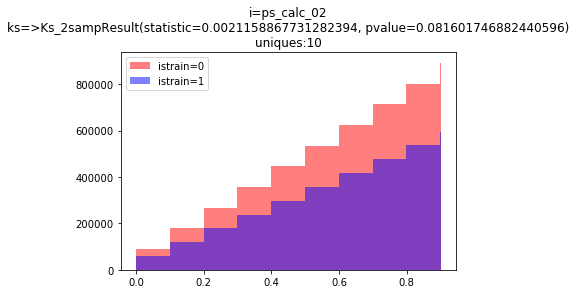

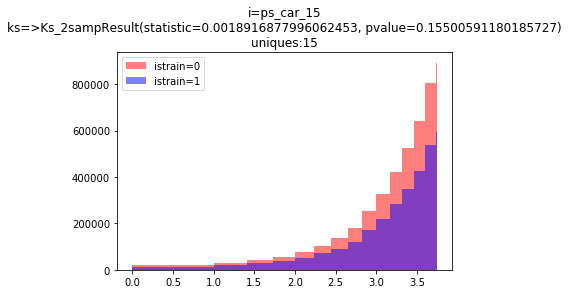

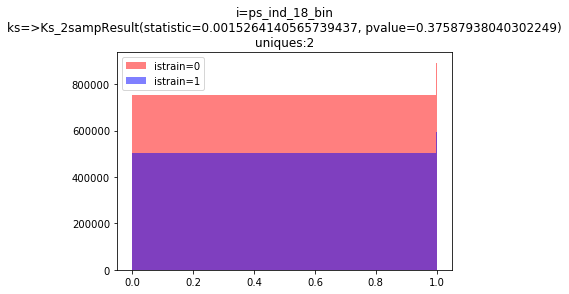

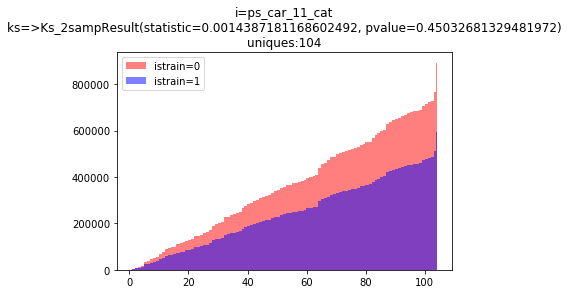

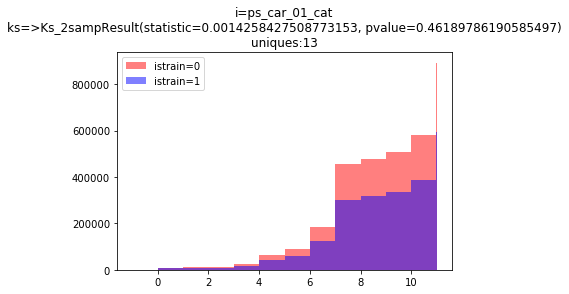

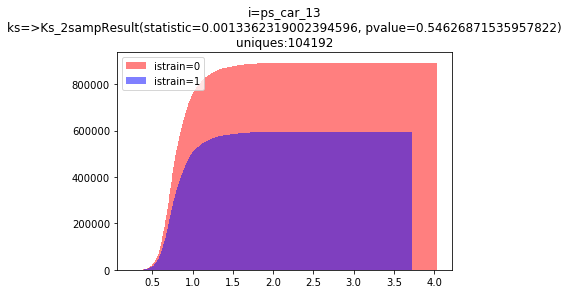

In [12]:
vals=pd.Series(fields_dict).sort_values().reset_index(drop=False)
for i in range(10):
    i=vals.loc[i]['index']
    plt.title('i='+str(i)+'\nks=>'+str(ks_2samp(xdat[y==0][i],xdat[y==1][i]))+"\n"+
             "uniques:"+str(len(xdat[i].unique())))
    plt.hist(xdat[y==0][i],color='red' ,alpha=.5,label='istrain=0',bins=1000,cumulative=True)
    plt.hist(xdat[y==1][i],color='blue',alpha=.5,label='istrain=1',bins=1000,cumulative=True)
    plt.legend()
    plt.show()
